In [2]:
from astropy.io import fits as pyfits
from astropy import wcs as pywcs
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
import matplotlib.pyplot as plt
import numpy as np
import os
from photutils import CircularAperture

In [3]:
# Import the function definitions that accompany this notebook tutorial.
nb_funcdef_file = "function_defs.py"
if os.path.isfile(nb_funcdef_file):
    from function_defs import listdir_contains
else:
    raise IOError("Could not find function definition file '" + nb_funcdef_file + "' that goes with this notebook.")

In [4]:
# Restore the output directory.  Note: this assumes you've run the "generate_products" notebook already.  If not you
# will need to specify the location of the products made from the "generate_products" notebook.
%store -r data_directory
# If you have not run the "generate_products" notebook during this session, uncomment the line below and specify
# the location of the output products.
#data_directory = "./raw_files/"

In [5]:
# Locate the output FITS files.
fuv_fits_files = listdir_contains(data_directory,'-fd.fits')
nuv_fits_files = listdir_contains(data_directory,'-nd.fits')

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-30a5111292c7>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if band is 'FUV':
<ipython-input-7-30a5111292c7>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if band is 'NUV':
<ipython-input-7-30a5111292c7>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if band is 'NUV' and i == 2:
<ipython-input-7-30a5111292c7>:33: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(image), cmap='Greys_r', origin='lower', norm=norm)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend

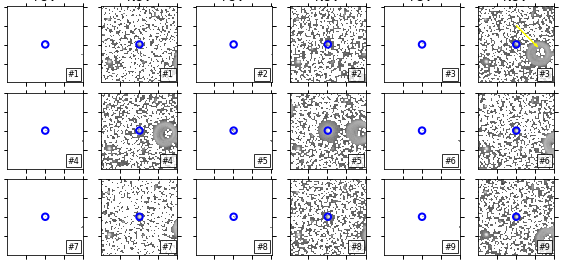

In [7]:
imsz = [3600,3600]
positions = ((imsz[0]/2,imsz[1]/2))
apertures = CircularAperture(positions, r=8.533333333333326)
n_visits = 9
plt.figure(figsize=(8,4))
for band in ['FUV','NUV']:
    for i in np.arange(n_visits):
        if band == 'FUV':
            with pyfits.open(fuv_fits_files[i], mode="readonly") as hdulist:
                image = hdulist[0].data
                wcs = pywcs.WCS(hdulist[0].header)
            ax = plt.subplot(3,6,2*i+1,projection=wcs)
            if (i<=2):
                ax.set_title('FUV')
        if band == 'NUV':
            with pyfits.open(nuv_fits_files[i], mode="readonly") as hdulist:
                image = hdulist[0].data
                wcs = pywcs.WCS(hdulist[0].header)
            ax = plt.subplot(3,6,2*i+2,projection=wcs)
            ax.coords[1].set_ticklabel_visible(False)
            ax.coords[1].set_axislabel('')
            if (i<=2):
                ax.set_title('NUV')
        ax.coords[0].set_ticklabel_visible(False)
        ax.coords[0].set_axislabel('')
        ax.coords[1].set_ticklabel_visible(False)
        ax.coords[1].set_axislabel('')
        ax.text(0.95, 0.05, '#{visit}'.format(visit=i+1),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, color='black', fontsize=8,
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':2})
        norm = ImageNormalize(stretch=SqrtStretch())
        ax.imshow(np.log10(image), cmap='Greys_r', origin='lower', norm=norm)
        apertures.plot(color='blue', lw=2, alpha=1)
        ax.set_xlim(imsz[0]/2-100, imsz[0]/2+100)
        ax.set_ylim(imsz[1]/2-100, imsz[1]/2+100)
        if band == 'NUV' and i == 2:
            # Add an arrow showing the hotspot mask the first time it is clearly visible.
            ax.arrow(1800, 1850, 50, -50, color="yellow", head_width=6)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
if not os.path.exists('figures'):
    os.makedirs('figures')
plt.savefig('figures/thumbnails.eps',dpi=600)